<a href="https://colab.research.google.com/github/Kaguya2906/Anomaly_Detection_Weekly_Project/blob/main/06.PCA%2CKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook, I'll introduce how KNN and PCA working on anomaly detection. I'll show you what they are, how they function, and how to read the results.

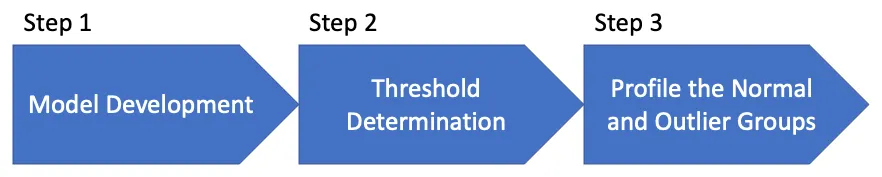


# Libraries, Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("inpatientCharges.csv")
df.head(5)

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


## Dataset after feature engineering

In [ ]:
df.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,5658.33,4851.44


#(A)PCA

How Does PCA Work?

A high-dimensional dataset is a dataset that has a significant number of variables. Such a dataset brings the “curse of dimensionality” and often presents computational challenges. Although high-power computing can somehow handle high-dimensional data, in many applications it is still necessary to reduce the dimensionality of the original data. PCA reduced the dimensionality of a dataset consisting of a large number of related variables while retaining as much variance as possible. PCA finds new variables that the original variables are just their linear combinations. The new variables are called Principal Components (PCs). These principal components are orthogonal, meaning the principal components are perpendicular to each other. In a 3-D case, X can not be represented by Y or Y cannot be presented by Z. The word orthogonal comes from the Greek orthogōnios meaning “right-angled.”

In the linear transformation, the covariance matrix of the data is decomposed to orthogonal vectors, called eigenvectors, associated with eigenvalues. An eigenvalue is a factor by which the eigenvector is scaled. The eigenvectors with high eigenvalues capture most of the variance in the data. “Eigen” is a German word meaning “own” or “typical”. An eigenvector can be called a “characteristic vector”.

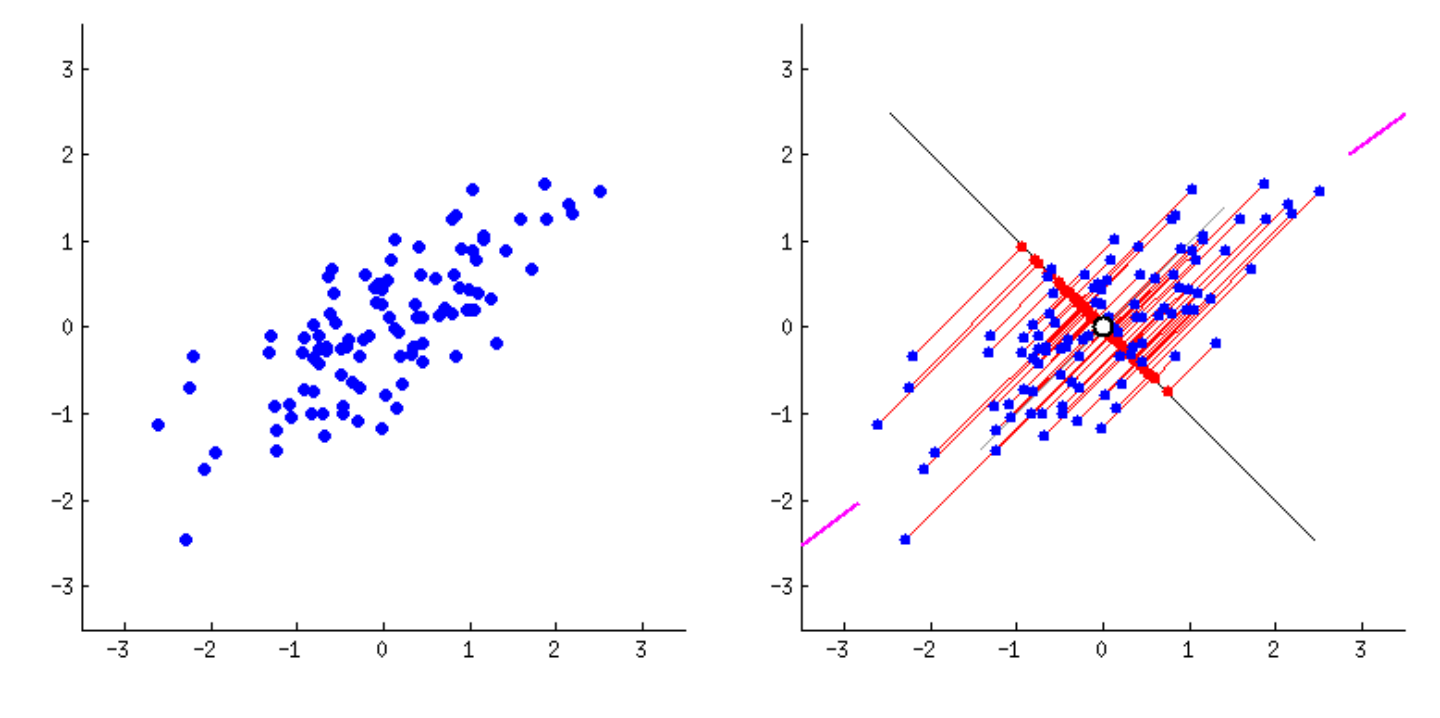

## How Is the Anomaly Score Defined?

When dimensions are reduced to a few principal dimensions, patterns are identified and then outliers are revealed. The intuition comes from outliers themselves. D.M.Hawkins [1] once gave a good definition for an outlier: ” An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.” Because outliers tend to follow different tools, they usually are not in the first few principal components. When they are projected to the low-dimensional hyperplane, they will fall onto some unique eigenvectors with small eigenvalues. We can say outlier detection is a by-product of dimension reduction. With this property, the outlier score of a data point in PCA as the following:

Outlier Score = **Sum of weighted euclidean distance between each observation to the hyperplane constructed by the selected eigenvectors**

**Remember to Standardize the Data before Running PCA**

## Train-test split

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pyod.utils.data import generate_data
from pyod.utils.utility import standardizer

# Split the data into training and test sets using train_test_split
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Convert the training and test data to pandas DataFrames
X_train_pd = pd.DataFrame(X_train)
X_test_pd = pd.DataFrame(X_test)

## Build the model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pyod.models.pca import PCA

pca_model = PCA(n_components=2, contamination=0.05)
pca_model.fit(X_train)

# Generate PCA scores for the training and test data
y_train_scores = pca_model.decision_function(X_train)
y_test_scores = pca_model.decision_function(X_test)

# The PCA scores are now stored in 'y_train_scores' and 'y_test_scores'
print("PCA scores for the training data:")
print(y_train_scores)

print("\nPCA scores for the test data:")
print(y_test_scores)

PCA scores for the training data:
[64.52556121 22.31292479 14.88018664 ... 27.35136211 19.69958535
 24.81649055]

PCA scores for the test data:
[37.84418146 28.96491304 25.78230062 ... 23.21333268 24.29473363
 22.67606251]


In [ ]:
def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic.
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("Training data - Outlier Count:", count_stat(y_train_pred))
print("Test data - Outlier Count:", count_stat(y_test_pred))
# Threshold for the defined contamination rate
print("The threshold for the defined contamination rate:", pca_model.threshold_)

Training data - Outlier Count: {0: 130452}
Test data - Outlier Count: {0: 32613}
The threshold for the defined contamination rate: 53.071415274346826


## PCA Parameters

In [ ]:
pca.get_params()

{'contamination': 0.05,
 'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'n_selected_components': None,
 'random_state': None,
 'standardization': True,
 'svd_solver': 'auto',
 'tol': 0.0,
 'weighted': True,
 'whiten': False}

In [ ]:
[pca.explained_variance_,
pca.explained_variance_ratio_]

[array([5.59094654e+00, 1.19010208e+00, 1.04534965e+00, 9.56949402e-01,
        8.09687785e-01, 2.79386332e-01, 8.74227285e-02, 2.87270094e-02,
        1.03092235e-02, 1.19590469e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([5.59090368e-01, 1.19009296e-01, 1.04534164e-01, 9.56942067e-02,
        8.09681579e-02, 2.79384190e-02, 8.74220583e-03, 2.87267892e-03,
        1.03091445e-03, 1.19589553e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00])]

## PCA Histogram auto bins

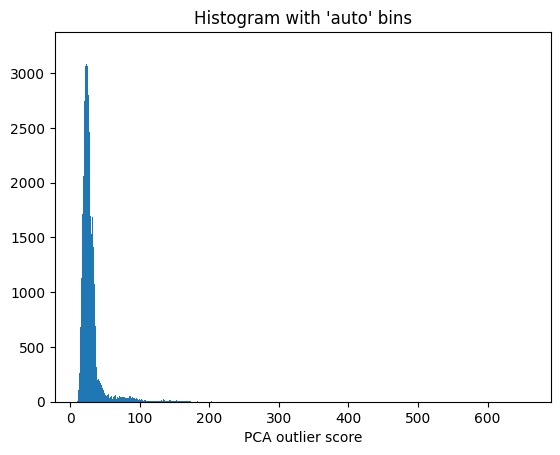

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlabel('PCA outlier score')
plt.show()

## PCA Threshold

In [ ]:
print("The threshold for the defined comtanimation rate:" , pca_model.threshold_)

The threshold for the defined comtanimation rate: 53.071415274346826


In [ ]:
threshold = pca_model.threshold_

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

## PCA Descriptive Statistics

In [ ]:
descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,Provider_Zipcode,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_by_state,Std_Total_Payments_by_state,Average_Medicare_Payments_by_state,Std_Medicare_Payments_by_state,Is_Top_Provider_Location,Unusual_Variation_Total_Discharges,Inconsistent_Billing_Patterns,Payment_Trend_Change,Unusual_Provider_Relationships,Provider_Concentration,Anomaly_Score
0,Normal,123929,94.999693,47750.14,41.03,8450.52,7302.60,8483.76,1613.11,7330.09,1514.67,0.27,0.0,0.0,0.0,0.0,0.0,25.79
1,Outlier,6523,5.000307,50634.30,76.43,33638.80,31196.32,32944.09,7512.37,30597.15,7019.94,0.36,0.0,0.0,0.0,0.0,0.0,90.18


In [ ]:
descriptive_stat_threshold(X_test,y_test_scores, threshold)

,Group,Count,Count %,Provider_Zipcode,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_by_state,Std_Total_Payments_by_state,Average_Medicare_Payments_by_state,Std_Medicare_Payments_by_state,Is_Top_Provider_Location,Unusual_Variation_Total_Discharges,Inconsistent_Billing_Patterns,Payment_Trend_Change,Unusual_Provider_Relationships,Provider_Concentration,Anomaly_Score
0,Normal,30970,94.962132,48008.87,40.93,8449.39,7297.19,8493.35,1609.19,7340.27,1511.30,0.27,0.0,0.0,0.0,0.0,0.0,25.80
1,Outlier,1643,5.037868,50079.48,75.75,33220.62,30835.25,32642.57,7535.88,30328.56,7071.27,0.35,0.0,0.0,0.0,0.0,0.0,89.19


# (B)KNN
KNNs are typically used as a supervised learning technique where the target labels are provided. KNNs can also be used for the computation of the distance to the k neighbors. Because the latter does not use a target variable, some on-line sources such as the scikit-learn KNN [1] calls it unsupervised learning. The KNN in PyOD uses the latter. It computes the distance to the k neighbors and uses the distance to define the outlier scores.

It simply computes the distances between neighbors.

Step 1: For each data point, calculate the distance to other data points.

Step 2: Sort the data points from smallest to largest by the distance.

Step 3: Pick the first K entries.

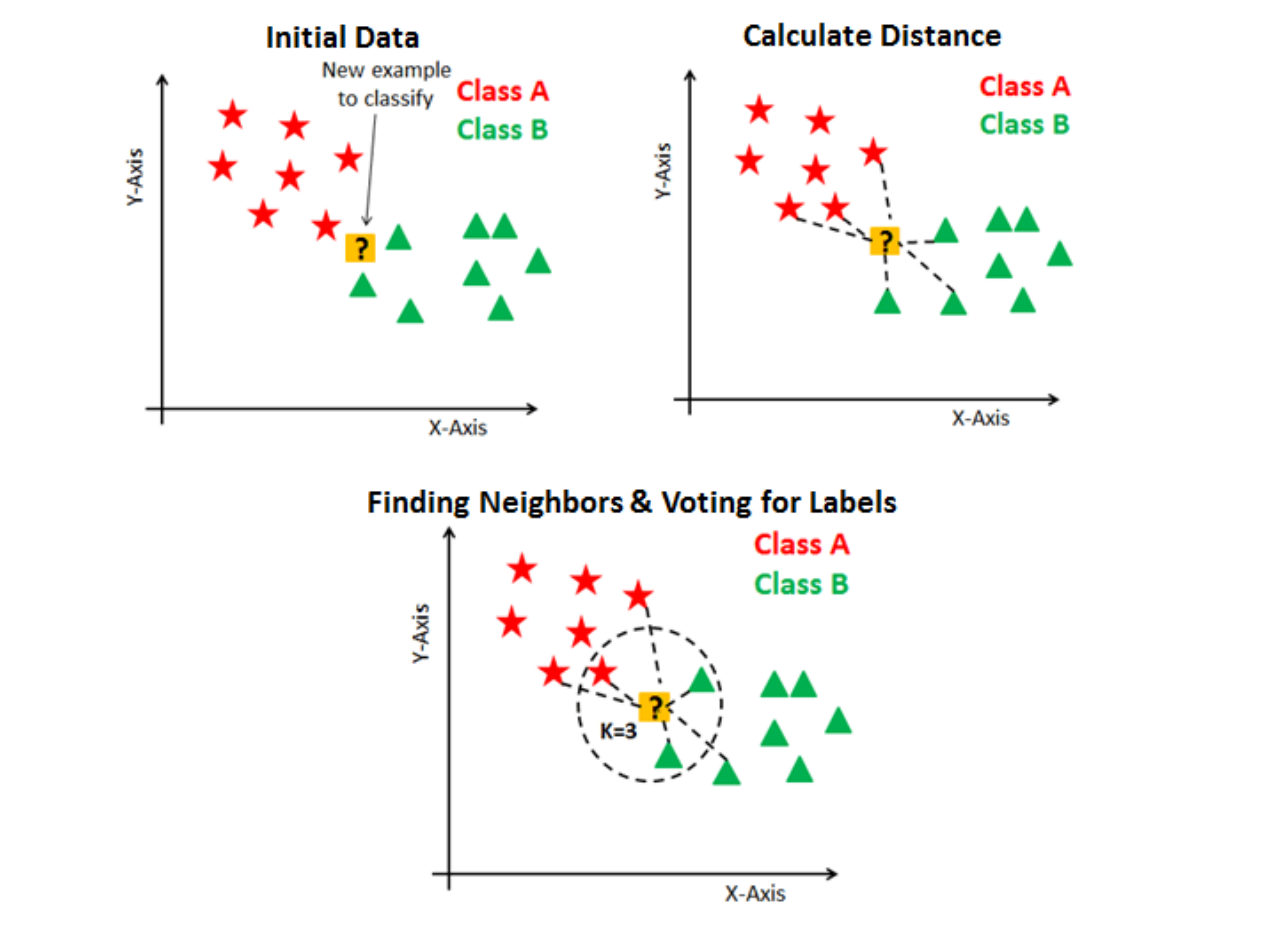

## How Is the Anomaly Score Defined?

Since an outlier is a point that is distant from neighboring points, the outlier score is defined as the distance to its kth nearest neighbor. Each point will have an outlier score. Our job is to find those points with high outlier scores.

The KNN method in PyOD uses one of the three types of distance measures as the outlier score: largest (default), mean, and median. The “largest” uses the largest of the distance to k neighbors as the outlier score. The “mean” and “median” use the average and median respectively as the outlier score.

## Train-test split

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pyod.utils.data import generate_data
from pyod.utils.utility import standardizer

# Split the data into training and test sets using train_test_split
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

# Convert the training and test data to pandas DataFrames
X_train_pd = pd.DataFrame(X_train)
X_test_pd = pd.DataFrame(X_test)

## Build the model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pyod.models.knn import KNN

# train kNN detector
from pyod.models.knn import KNN

knn = KNN()
knn.fit(X_train)

# Generate KNN scores for the training and test data
y_train_scores = knn.decision_function(X_train)
y_test_scores = knn.decision_function(X_test)

# The KNN scores are now stored in 'y_train_scores' and 'y_test_scores'
print("KNN scores for the training data:")
print(y_train_scores)

print("\nKNN scores for the test data:")
print(y_test_scores)

KNN scores for the training data:
[1917.9474479   634.818775    324.88258341 ...  506.91656217 1829.15672034
  257.49339506]

KNN scores for the test data:
[ 496.89755655 1317.08731146  196.30952793 ...  277.81980752  625.22784791
  966.06289718]


## KNN Parameters

In [ ]:
from pyod.models.knn import KNN
knn = KNN(contamination=0.05)
knn.fit(X_train)

# Training data
y_train_scores = knn.decision_function(X_train)
y_train_pred = knn.predict(X_train)

# Test data
y_test_scores = knn.decision_function(X_test)
y_test_pred = knn.predict(X_test) # outlier labels (0 or 1)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic.
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
print("The training data:", count_stat(y_test_pred))
# Threshold for the defined comtanimation rate
print("The threshold for the defined comtanimation rate:" , knn.threshold_)

The training data: {0: 124871, 1: 5581}
The training data: {0: 30971, 1: 1642}
The threshold for the defined comtanimation rate: 2392.1241892669477


In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'contamination': 0.05,
 'leaf_size': 30,
 'method': 'largest',
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'radius': 1.0}

## KNN Histogram auto bins

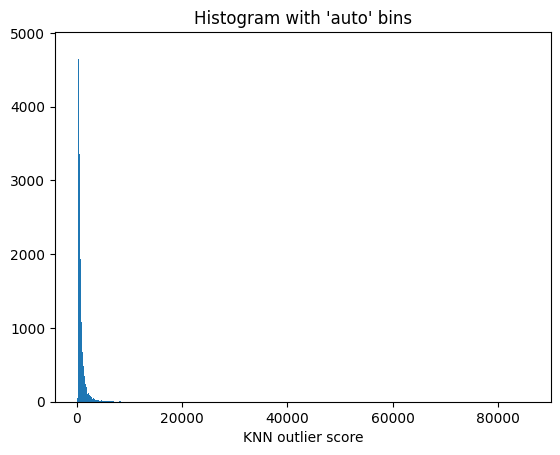

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlabel('KNN outlier score')
plt.show()

## KNN Threshold

In [ ]:
# Threshold for the defined comtanimation rate
print("The threshold for the defined comtanimation rate:" , knn.threshold_)

The threshold for the defined comtanimation rate: 2392.1241892669477


In [ ]:
threshold = knn.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

## KNN Descriptive Statistics

In [ ]:
descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,Provider_Zipcode,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_by_state,Std_Total_Payments_by_state,Average_Medicare_Payments_by_state,Std_Medicare_Payments_by_state,Is_Top_Provider_Location,Unusual_Variation_Total_Discharges,Inconsistent_Billing_Patterns,Payment_Trend_Change,Unusual_Provider_Relationships,Provider_Concentration,Anomaly_Score
0,Normal,124871,95.721798,47767.95,43.33,8729.58,7617.71,8885.96,1719.64,7721.17,1616.09,0.27,0.0,0.0,0.0,0.0,0.0,638.47
1,Outlier,5581,4.278202,50722.54,31.04,31646.48,28179.04,28073.83,6124.52,25774.15,5679.96,0.42,0.0,0.0,0.0,0.0,0.0,4739.12


In [ ]:
descriptive_stat_threshold(X_test,y_test_scores, threshold)

,Group,Count,Count %,Provider_Zipcode,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_by_state,Std_Total_Payments_by_state,Average_Medicare_Payments_by_state,Std_Medicare_Payments_by_state,Is_Top_Provider_Location,Unusual_Variation_Total_Discharges,Inconsistent_Billing_Patterns,Payment_Trend_Change,Unusual_Provider_Relationships,Provider_Concentration,Anomaly_Score
0,Normal,30971,94.965198,48011.64,43.30,8586.97,7478.11,8752.33,1683.59,7595.56,1584.03,0.27,0.0,0.0,0.0,0.0,0.0,673.19
1,Outlier,1642,5.034802,50028.53,31.02,30640.80,27437.01,27772.38,6136.23,25527.35,5702.94,0.40,0.0,0.0,0.0,0.0,0.0,4664.30


## KNN Averages

In [ ]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
# Standardize data
X_train_norm, X_test_norm = standardizer(X_train, X_test)
# Test a range of k-neighbors from 10 to 200. There will be 20 k-NN models.
k_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,
 120, 130, 140, 150, 160, 170, 180, 190, 200]
n_clf = len(k_list)
# Just prepare data frames so we can store the model results
train_scores = np.zeros([X_train.shape[0], n_clf])
test_scores = np.zeros([X_test.shape[0], n_clf])
train_scores.shape
# Modeling
for i in range(n_clf):
    k = k_list[i]
    clf = KNN(n_neighbors=k, method='largest')
    clf.fit(X_train_norm)

    # Store the results in each column:
    train_scores[:, i] = clf.decision_scores_
    test_scores[:, i] = clf.decision_function(X_test_norm)
# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

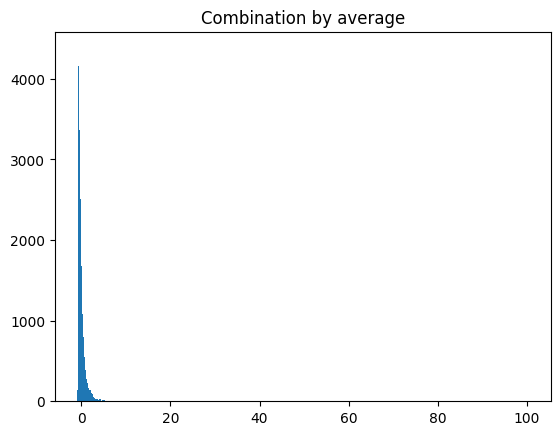

In [ ]:
# Combination by average
# The test_scores_norm is 500 x 10. The "average" function will take the average of the 10 columns.
# The result "y_by_average" is a single column:
y_train_by_average = average(train_scores_norm)
y_test_by_average = average(test_scores_norm)
import matplotlib.pyplot as plt
plt.hist(y_train_by_average, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [ ]:
descriptive_stat_threshold(X_train,y_train_by_average, 0.5)

,Group,Count,Count %,Provider_Zipcode,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_by_state,Std_Total_Payments_by_state,Average_Medicare_Payments_by_state,Std_Medicare_Payments_by_state,Is_Top_Provider_Location,Unusual_Variation_Total_Discharges,Inconsistent_Billing_Patterns,Payment_Trend_Change,Unusual_Provider_Relationships,Provider_Concentration,Anomaly_Score
0,Normal,108941,83.51041,47978.14,35.88,7514.50,6441.38,7678.91,1436.96,6578.41,1361.04,0.24,0.0,0.0,0.0,0.0,0.0,-0.31
1,Outlier,21511,16.48959,47470.03,77.87,20829.01,18909.75,19977.26,4294.08,18192.45,3962.10,0.45,0.0,0.0,0.0,0.0,0.0,1.56


In [ ]:
descriptive_stat_threshold(X_test,y_test_by_average, 0.5)

,Group,Count,Count %,Provider_Zipcode,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Total_Payments_by_state,Std_Total_Payments_by_state,Average_Medicare_Payments_by_state,Std_Medicare_Payments_by_state,Is_Top_Provider_Location,Unusual_Variation_Total_Discharges,Inconsistent_Billing_Patterns,Payment_Trend_Change,Unusual_Provider_Relationships,Provider_Concentration,Anomaly_Score
0,Normal,27183,83.350198,48241.38,35.64,7518.02,6442.97,7694.10,1437.98,6593.50,1362.73,0.24,0.0,0.0,0.0,0.0,0.0,-0.31
1,Outlier,5430,16.649802,47471.44,77.90,20607.15,18695.55,19801.46,4259.56,18034.42,3937.38,0.45,0.0,0.0,0.0,0.0,0.0,1.53
